In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [191]:
df=pd.read_csv('Data File.csv')
pd.set_option('display.max_columns', None)


In [192]:
df

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  \
0         220.13    260.13                2.0                0.0   
1        3691.26   3691.26               20.0                0.0   
2         900.13    900.13                3.0                0.0   
3         159.42    159.42               41.0                0.0   
4        1098.90   1098.90                4.0                0.0   
...          ...       ...                ...                ...   
209588   1089.19   1089.19                1.0                0.0   
209589   1728.36   1728.36                4.0                0.0   
209590   5861.83   8893.20                3.0                0.0   
209591    411.83    984.58                2.0               38.0   
209592    483.92    631.20               13.0                0.0   

        last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  \
0                   1539              2          21.0             3078.0   
1                   5787              1           0.0             5787.0   
2                   1539              1           0.0             1539.0   
3                    947              0           0.0                0.0   
4                   2309              7           2.0            20029.0   
...                  ...            ...           ...                ...   
209588              4048              3           2.0            10404.0   
209589               773              4           1.0             3092.0   
209590              1539              5           8.0             9334.0   
209591               773              5           4.0            12154.0   
209592              7526              2           1.0             9065.0   

        medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
0                     1539.0                  7.50              2   
1                     5787.0                 61.04              1   
2                     1539.0                 66.32              1   
3                        0.0                  0.00              1   
4                     2309.0                 29.00              8   
...                      ...                   ...            ...   
209588                3178.0                 91.81              3   
209589                 773.0                161.30              6   
209590                1539.0                 51.13             11   
209591                 773.0                164.00              6   
209592                4532.5                356.70              3   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
0                 21               3078                1539.0   
1                  0               5787                5787.0   
2                  0               1539                1539.0   
3                  0                947                 947.0   
4                  2              23496                2888.0   
...              ...                ...                   ...   
209588             2              10404                31

In [193]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

We have a separate file to see through the details of the column.

Initial check --> we can remove the msisdn, I understand that this is the Phone number and there aer duplicates as well, but if we look into the perspective on whether it will affect the final prediction or not, the answer will be negative as the Phone number will not affect the repayment in anyway, though the data in the Phone number will but considering the Phone number just to be discrete, it will not help us in anyway, hence we will remove the data.

In [194]:
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

We can remove pcirlce as the circle is single and if any other data comes in wherein the circle is different, it might predit a woring result, so we will be removing the column.

We will also remove the pdate column as that do not have any relevance in the dataset.

Let us remove the 2 data that we had finalised.

In [195]:
df=df.drop(columns=['pcircle','msisdn','Unnamed: 0','pdate'])

In [196]:
df

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0               21.0             3078.0                1539.0   
1                0.0             5787.0                5787.0   
2                0.0             1539.0                1539.0   
3                0.0                0.0                   0.0   
4                2.0            20029.0                2309.0   
...              ...                ...                   ...   
209588           2.0            10404.0                3178.0   
209589           1.0             3092.0                 773.0   
209590           8.0             9334.0                1539.0   
209591           4.0            12154.0                 773.0   
209592           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                       7.50              2            21               3078   
1                      61.04              1             0               5787   
2                      66.32              1             0               1539   
3                       0.00              1             0                947   
4                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
209588                 91.81              3             2              10404   
209589                161.30              6             2               4038   
209590                 51.13             11             5              18592   
209591                164.00              6             4              17941   
209592                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                     1539.0                  7.50            0.0   
1                     5787.0                 61.04            0.0   
2                     1539.0                 66.32            0.0   
3                      947.0                  2.50            0.0   
4                     2888.0                 35.00            0.0   
..

We have 33 columns now.

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

As we see, all the data is in numeric format.

We can check the possible correlation now.

<AxesSubplot:>

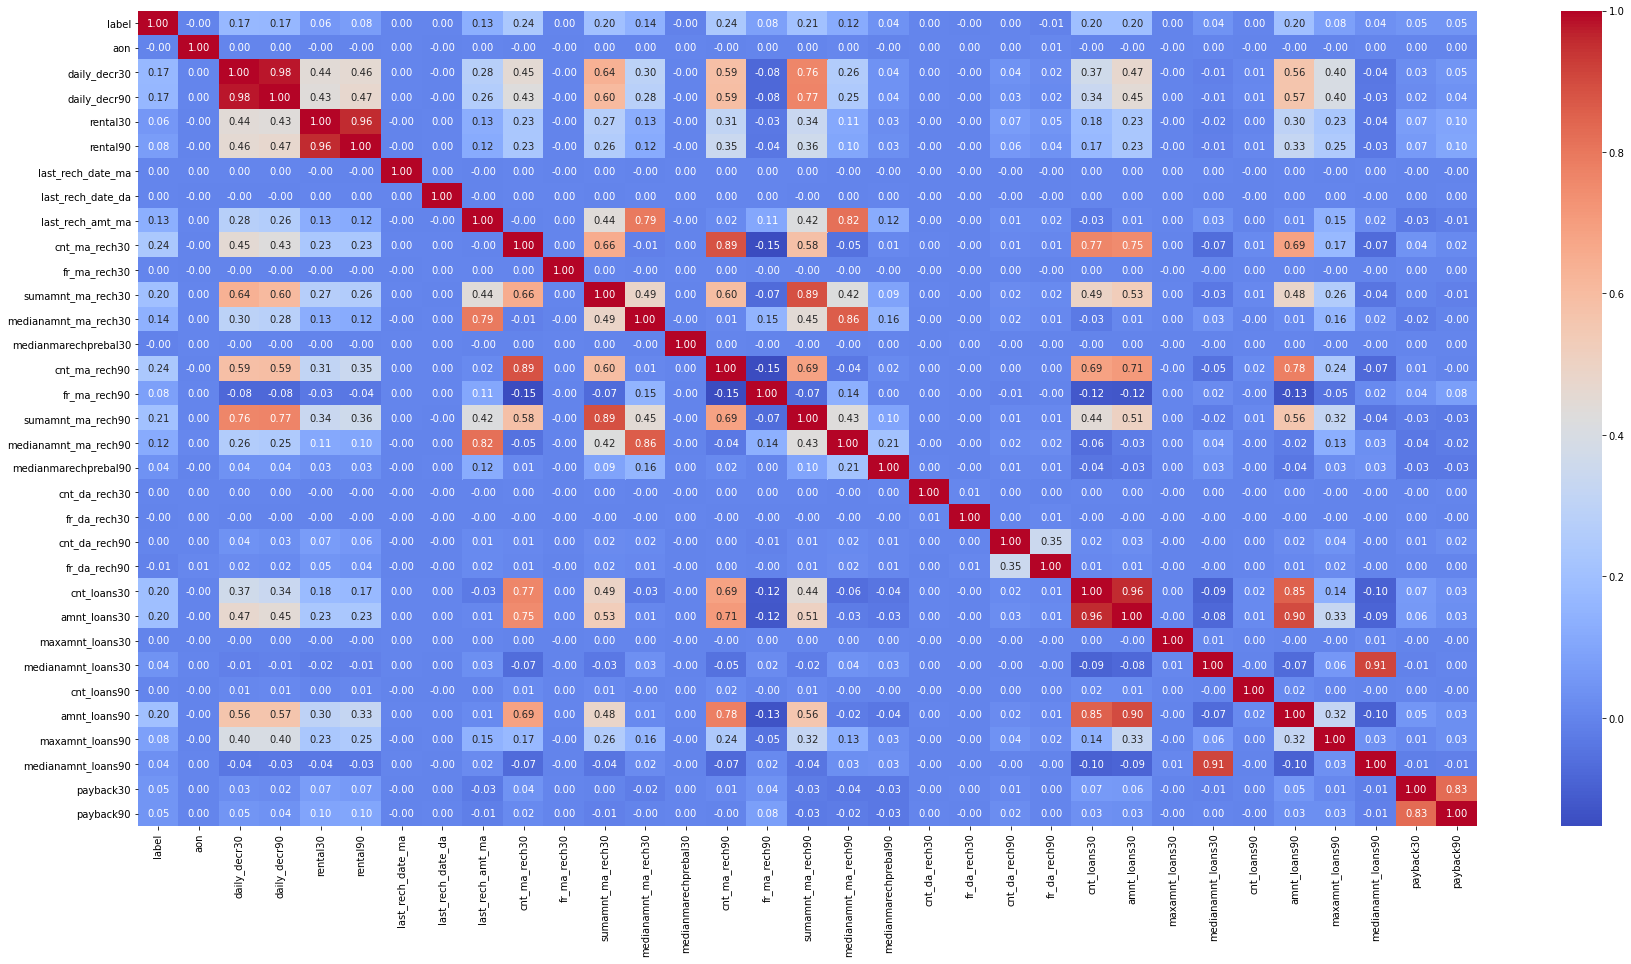

In [198]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), annot=True,fmt='.2f',cmap= 'coolwarm')

Observations: 

Here are the list of columns which is not having any relation with the other columns that we have:


              aon is not having any correlation for target variable or any other variable so that will not contribute in the                          data in any manner, hence we will consider removing that part of the data.
    
              same is the case with Last recharge for main account, data account.
    
              frequency of main account recharge in 30 days.
              
              Median of main account balance just before recharge in last 30 days at user level.
              
              Number of times data account got recharged in last 30 days
              
              Frequency of data account recharged in last 30 days
              
              maximum amount of loan taken by the user in last 30 days
              
              Number of loans taken by user in last 90 days
              
              we will now remove these columns and again plot correlation to check.
                  

In [199]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [200]:
df=df.drop(columns=['aon','last_rech_date_ma', 'last_rech_date_da','fr_ma_rech30','cnt_da_rech30', 'fr_da_rech30','medianmarechprebal30','maxamnt_loans30' ,'cnt_loans90'])

In [201]:
df

label  daily_decr30  daily_decr90  rental30  rental90  \
0           0   3055.050000   3065.150000    220.13    260.13   
1           1  12122.000000  12124.750000   3691.26   3691.26   
2           1   1398.000000   1398.000000    900.13    900.13   
3           1     21.228000     21.228000    159.42    159.42   
4           1    150.619333    150.619333   1098.90   1098.90   
...       ...           ...           ...       ...       ...   
209588      1    151.872333    151.872333   1089.19   1089.19   
209589      1     36.936000     36.936000   1728.36   1728.36   
209590      1  11843.111667  11904.350000   5861.83   8893.20   
209591      1  12488.228333  12574.370000    411.83    984.58   
209592      1   4489.362000   4534.820000    483.92    631.20   

        last_rech_amt_ma  cnt_ma_rech30  sumamnt_ma_rech30  \
0                   1539              2             3078.0   
1                   5787              1             5787.0   
2                   1539              1             1539.0   
3                    947              0                0.0   
4                   2309              7            20029.0   
...                  ...            ...                ...   
209588              4048              3            10404.0   
209589               773              4             3092.0   
209590              1539              5             9334.0   
209591               773              5            12154.0   
209592              7526              2             9065.0   

        medianamnt_ma_rech30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                     1539.0              2            21               3078   
1                     5787.0              1             0               5787   
2                     1539.0              1             0               1539   
3                        0.0              1             0                947   
4                     2309.0              8             2              23496   
...                      ...            ...           ...                ...   
209588                3178.0              3             2              10404   
209589                 773.0              6             2               4038   
209590                1539.0             11             5              18592   
209591                 773.0              6             4              17941   
209592                4532.5              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech90  \
0                     1539.0                  7.50              0   
1                     5787.0                 61.04              0   
2                     1539.0                 66.32              0   
3                      947.0                  2.50              0   
4                     2888.0                 35.00              0   
...                      ...                   ...            ...   
209588                3178.0                 91.81              0   
209589                 773.0                111.80              0   
209590                1539.0                 47.13              0   
209591                2410.5                100.00              1   
209592                7526.0                392.20              0   

        fr_da_rech90  cnt_loans30  amnt_loans30  medianamnt_loans30  \
0                  0            2            12                 0.0   
1                  0            1            12                 0.0   
2                  0            1             6                 0.0   
3                  0            2            12                 0.0   
4                  0            7            42                 0.0   
...              ...          ...           ...                 ...   
209588             0            2            12                 0.0   
209589             0            3            18                 0.0   
209590             0            4            42      

Now we are having 24 columns.

Again let us check the correlation to get better idea.

<AxesSubplot:>

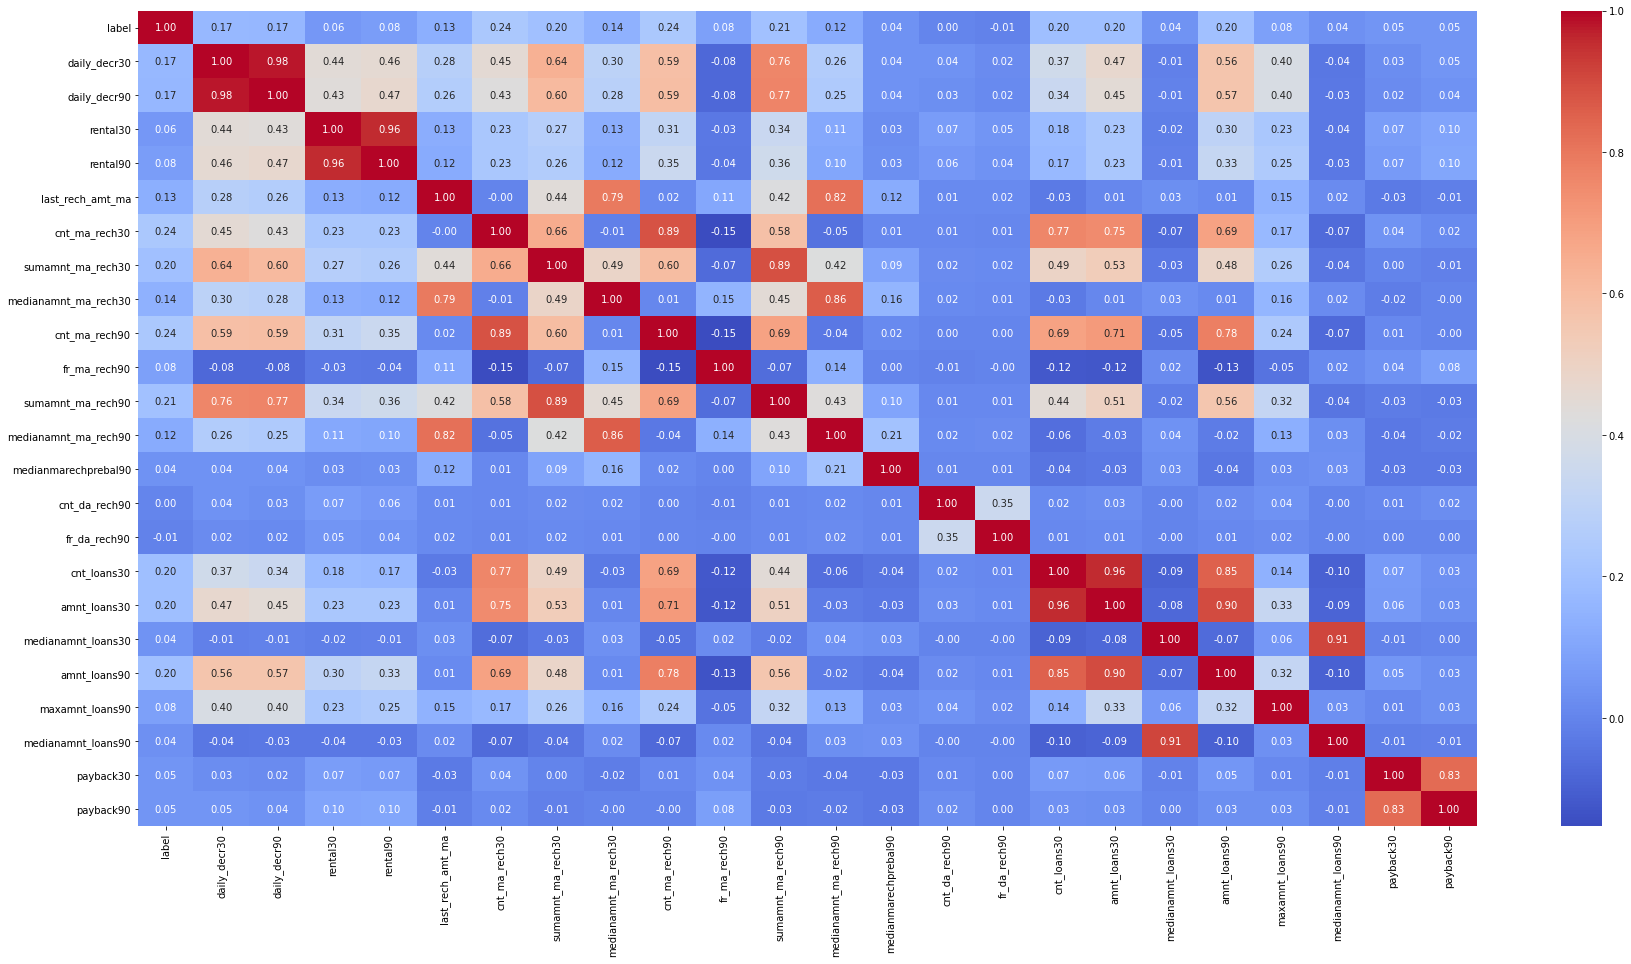

In [202]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), annot=True,fmt='.2f',cmap= 'coolwarm')

Number of times data account got recharged in last 90 days

Frequency of data account recharged in last 90 days

These are the one's which are having very low corerlation as low as 0.06 hence we can consider removing that as well.

In [203]:
df=df.drop(columns=['cnt_da_rech90', 'fr_da_rech90'])

Checking correlation again.

<AxesSubplot:>

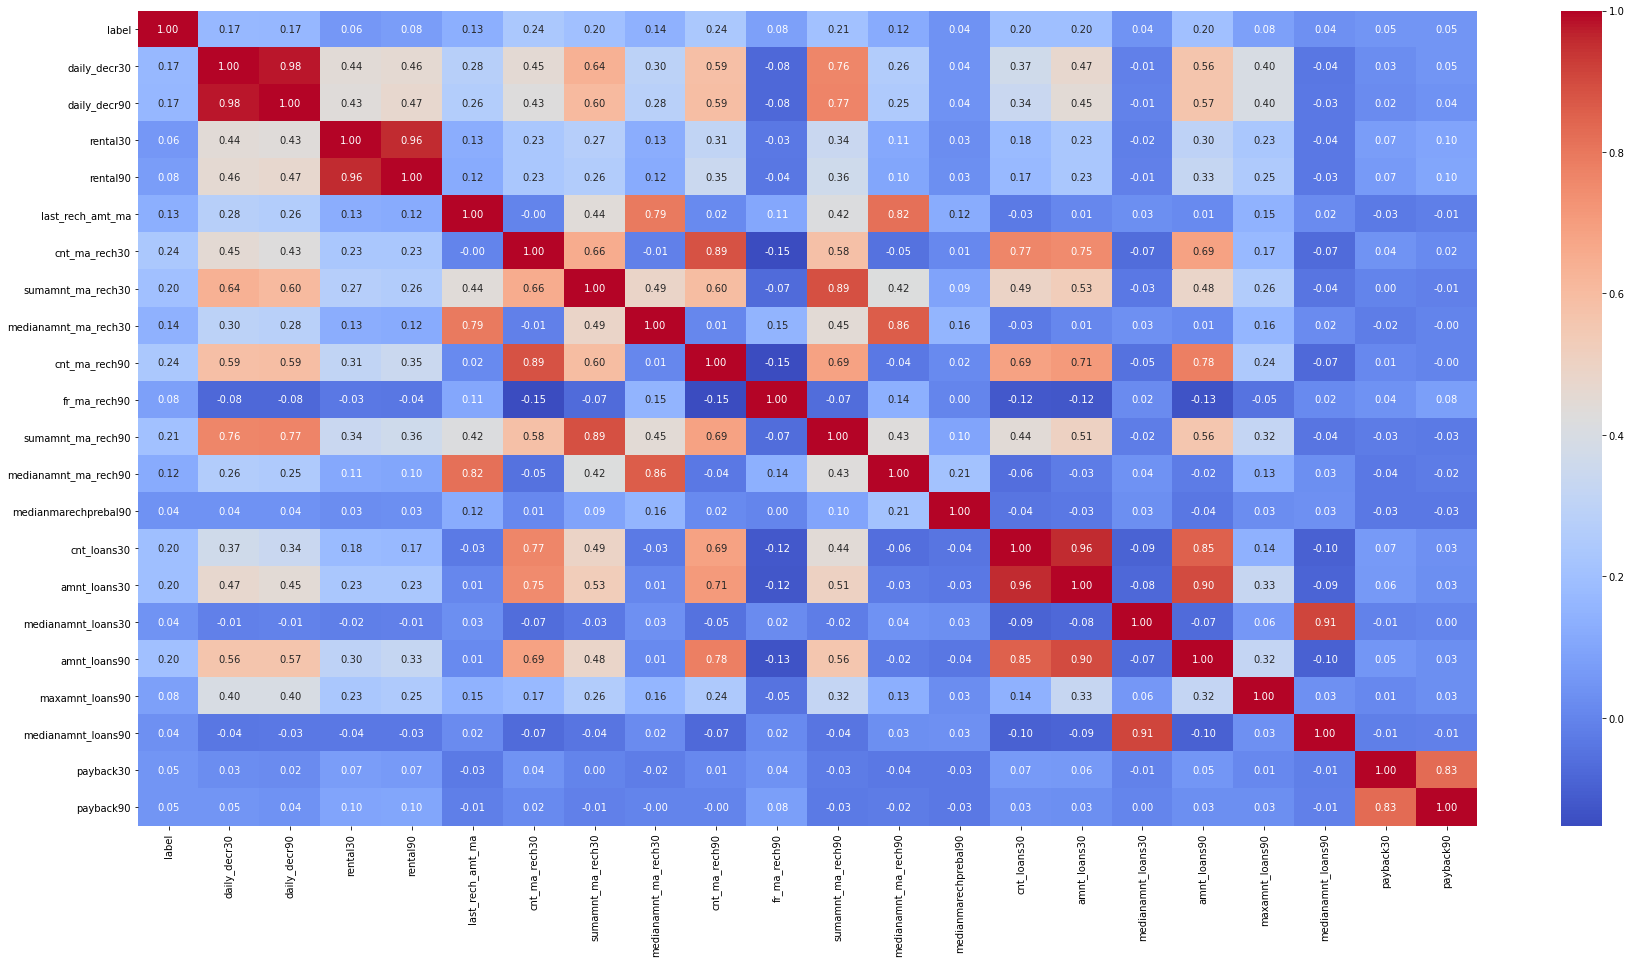

In [204]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), annot=True,fmt='.2f',cmap= 'coolwarm')

Daily secr 30 and 90 are correlated hence we can remove anyone of these.


Rental 30 and 90 are more than .90 correlated hence we can consider removing anyone of them.


Cnt loan 30 and amount loans 30 are more than .90 correlated hence we can consider removing anyone of them.


Pay back 30 and payback 90 are highly correlated and hence we can consider removing them as well.


Median amount loan 30 and median amount loan 90 are highly correlated and hence we can consider removing that because both almost will give same result at the end.



In [205]:
df.columns

Index(['label', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'medianamnt_loans30', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [206]:
df=df.drop(columns=['daily_decr30','rental30','cnt_loans30','payback30','medianamnt_loans30'])

In [207]:
df

label  daily_decr90  rental90  last_rech_amt_ma  cnt_ma_rech30  \
0           0   3065.150000    260.13              1539              2   
1           1  12124.750000   3691.26              5787              1   
2           1   1398.000000    900.13              1539              1   
3           1     21.228000    159.42               947              0   
4           1    150.619333   1098.90              2309              7   
...       ...           ...       ...               ...            ...   
209588      1    151.872333   1089.19              4048              3   
209589      1     36.936000   1728.36               773              4   
209590      1  11904.350000   8893.20              1539              5   
209591      1  12574.370000    984.58               773              5   
209592      1   4534.820000    631.20              7526              2   

        sumamnt_ma_rech30  medianamnt_ma_rech30  cnt_ma_rech90  fr_ma_rech90  \
0                  3078.0                1539.0              2            21   
1                  5787.0                5787.0              1             0   
2                  1539.0                1539.0              1             0   
3                     0.0                   0.0              1             0   
4                 20029.0                2309.0              8             2   
...                   ...                   ...            ...           ...   
209588            10404.0                3178.0              3             2   
209589             3092.0                 773.0              6             2   
209590             9334.0                1539.0             11             5   
209591            12154.0                 773.0              6             4   
209592             9065.0                4532.5              3            19   

        sumamnt_ma_rech90  medianamnt_ma_rech90  medianmarechprebal90  \
0                    3078                1539.0                  7.50   
1                    5787                5787.0                 61.04   
2                    1539                1539.0                 66.32   
3                     947                 947.0                  2.50   
4                   23496                2888.0                 35.00   
...                   ...                   ...                   ...   
209588              10404                3178.0                 91.81   
209589               4038                 773.0                111.80   
209590              18592                1539.0                 47.13   
209591              17941                2410.5                100.00   
209592              16591                7526.0                392.20   

        amnt_loans30  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0                 12            12                6                 0.0   
1                 12            12               12                 0.0   
2                  6             6                6                 0.0   
3                 12            12                6                 0.0   
4                 42            42                6                 0.0   
...              ...           ...              ...                 ...   
209588            12            12                6                 0.0   
209589            18            18                6                 0.0   
209590            42            54               12                 0.0   
209591            18            24               12                 0.0   
209592            18            18               12                 0.0   

        payback90  
0       29.000000  
1        0.000000  
2        0.000000  
3        0.000000  
4        2.333333  
...           ...  
209588   1.000000  
209589   1.000000  
209590   3.833333  
209591  10.500000  
209592   0.000000  

[209593 rows x 17 columns]

We have removed all the unwanted columns from the dataset and now we can consider to check the visualisation part and get inference.

## EDA

In [208]:
df.columns

Index(['label', 'daily_decr90', 'rental90', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'amnt_loans30',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback90'],
      dtype='object')

1    183431
0     26162
Name: label, dtype: int64


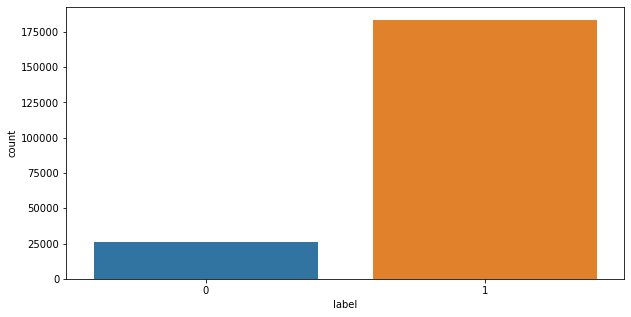

In [209]:
plt.figure(figsize=(10,5))
sns.countplot(x='label', data=df)
print(df['label'].value_counts())
plt.show()

Observations:
    
We are able to see here that out of the total data that we have 26162 which has to be treated later on to remove the imbalance in the data.


In [210]:
df.nunique()

label                        2
daily_decr90            158669
rental90                141033
last_rech_amt_ma            70
cnt_ma_rech30               71
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
amnt_loans30                48
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback90                 2381
dtype: int64

Let us compare the Average main accout balance over 90 days to the daily amount spent from main account.

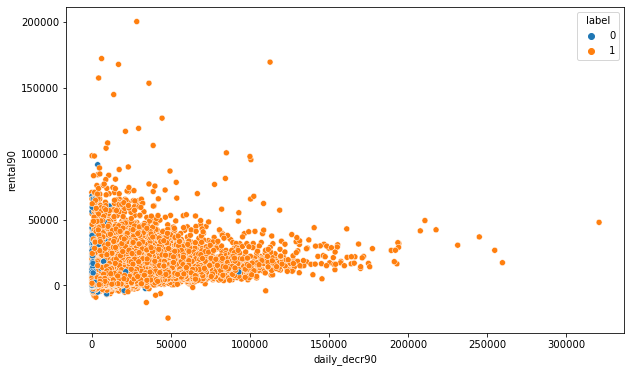

In [211]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='daily_decr90',y='rental90',hue='label')
plt.show()

As per the above graph, we see here that most of the people who are having very low recharge history and low spend tend, not to replay the amount taken in 5 days. 

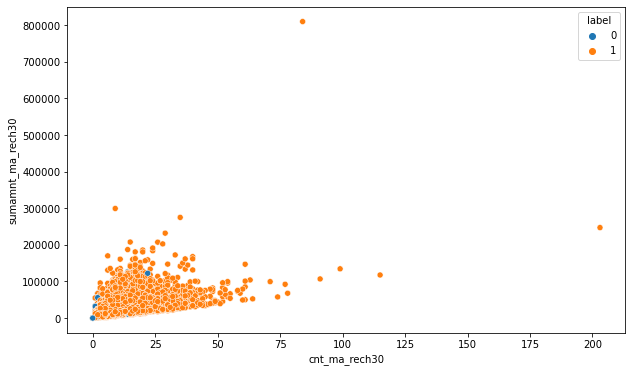

In [212]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='cnt_ma_rech30',y='sumamnt_ma_rech30',hue='label')
plt.show()

If a person is recharging more than 25 times in 90 days, there is a very low possibility that the amount is paid back tough as we saw above as well, with the decrease in number of recharge, there are chances that the user do not pays bacck the amount.

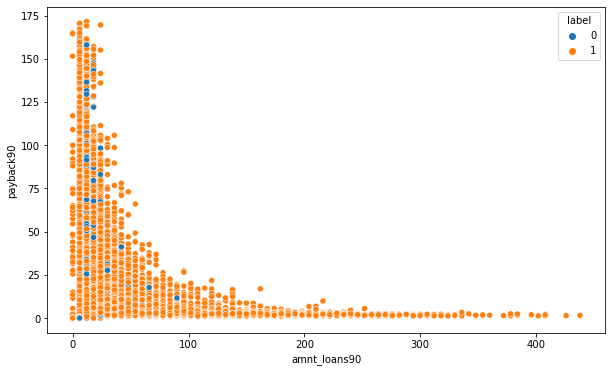

In [213]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='amnt_loans90',y='payback90',hue='label')
plt.show()

As per the data that we have, if any user who have taken loan more than 200 Rs in 90 days, they have all paid the amount back and the lesser the amount taken is, more is the chance that the user will not pay the amount back, though I know that there is an imbalance in the data, but looking at the data, we should infer that people who take less amount and take more time have less prbablity to pay back the amount.

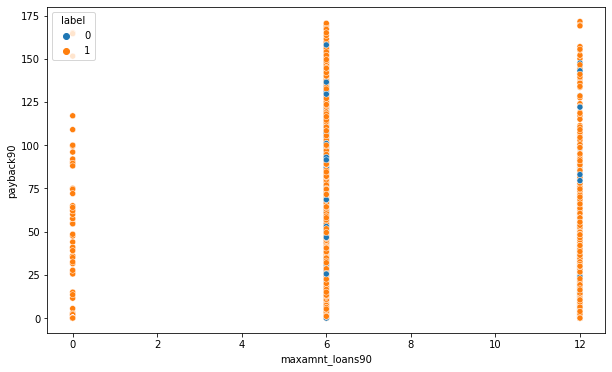

In [214]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='maxamnt_loans90',y='payback90',hue='label')
plt.show()

We see here that mostly, people who have taken loan 6 times are defaulting the replayment.

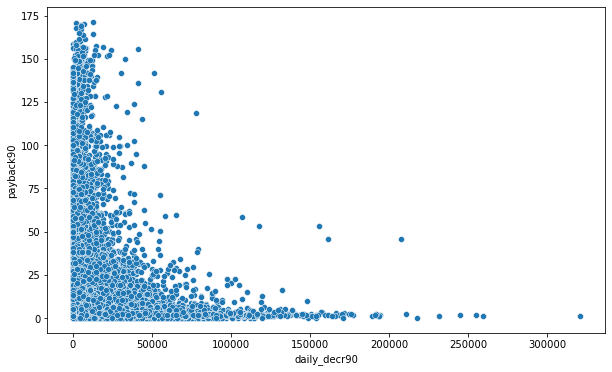

In [215]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='daily_decr90',y='payback90')
plt.show()

We are able to see here that the more the amount that is spent in 90 days, the earlier users tend to pay back the amount and with the decrease in the recharge in 90 daays, the pay back time also increases.

In [216]:
df.columns

Index(['label', 'daily_decr90', 'rental90', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'amnt_loans30',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback90'],
      dtype='object')

In [217]:
df.describe()

label   daily_decr90       rental90  last_rech_amt_ma  \
count  209593.000000  209593.000000  209593.000000     209593.000000   
mean        0.875177    6082.515068    3483.406534       2064.452797   
std         0.330519   10918.812767    5770.461279       2370.786034   
min         0.000000     -93.012667  -24720.580000          0.000000   
25%         1.000000      42.692000     300.260000        770.000000   
50%         1.000000    1500.000000    1334.000000       1539.000000   
75%         1.000000    7802.790000    4201.790000       2309.000000   
max         1.000000  320630.000000  200148.110000      55000.000000   

       cnt_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  cnt_ma_rech90  \
count  209593.000000      209593.000000         209593.000000   209593.00000   
mean        3.978057        7704.501157           1812.817952        6.31543   
std         4.256090       10139.621714           2070.864620        7.19347   
min         0.000000           0.000000              0.000000        0.00000   
25%         1.000000        1540.000000            770.000000        2.00000   
50%         3.000000        4628.000000           1539.000000        4.00000   
75%         5.000000       10010.000000           1924.000000        8.00000   
max       203.000000      810096.000000          55000.000000      336.00000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  209593.000000      209593.000000         209593.000000   
mean        7.716780       12396.218352           1864.595821   
std        12.590251       16857.793882           2081.680664   
min         0.000000           0.000000              0.000000   
25%         0.000000        2317.000000            773.000000   
50%         2.000000        7226.000000           1539.000000   
75%         8.000000       16000.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90   amnt_loans30   amnt_loans90  maxamnt_loans90  \
count         209593.000000  209593.000000  209593.000000    209593.000000   
mean              92.025541      17.952021      23.645398         6.703134   
std              369.215658      17.379741      26.469861         2.103864   
min             -200.000000       0.000000       0.000000         0.000000   
25%               14.600000       6.000000       6.000000         6.000000   
50%               36.000000      12.000000      12.000000         6.000000   
75%               79.310000      24.000000      30.000000         6.000000   
max            41456.500000     306.000000     438.000000        12.000000   

       medianamnt_loans90      payback90  
count       209593.000000  209593.000000  
mean             0.046077       4.321485  
std              0.200692      10.308108  
min              0.000000       0.000000  
25%              0.000000       0.000000  
50%              0.000000       1.666667  
75%              0.000000       4.500000  
max              3.000000     171.500000

We are able to see here that the label are only 2 values but for all other columns, there are significant differnce in the 75th percentile and the maximum amount so there is a possibility that the outliers might fetch the mean. We will have to treat them going further.

In [218]:
df.columns

Index(['label', 'daily_decr90', 'rental90', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'amnt_loans30',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback90'],
      dtype='object')

In [219]:
cols=['daily_decr90', 'rental90', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'amnt_loans30',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback90']

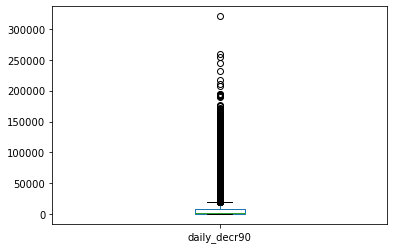

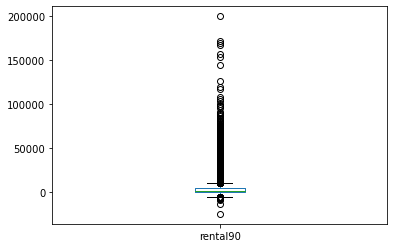

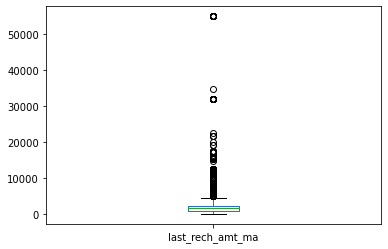

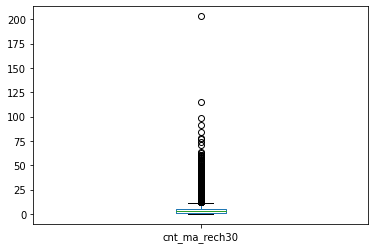

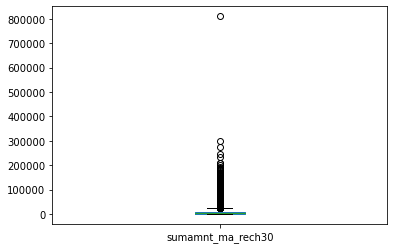

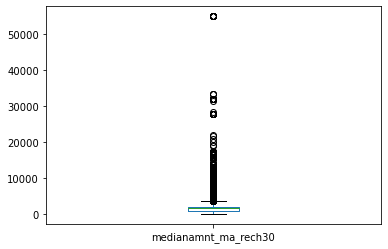

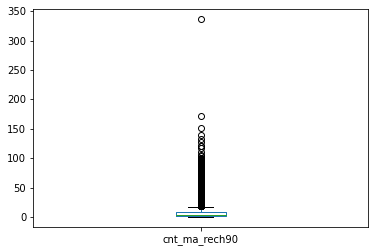

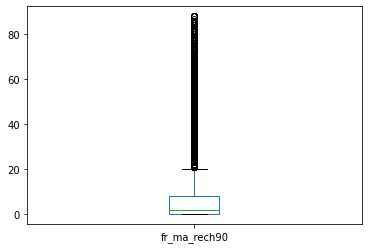

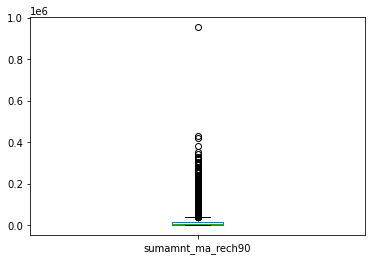

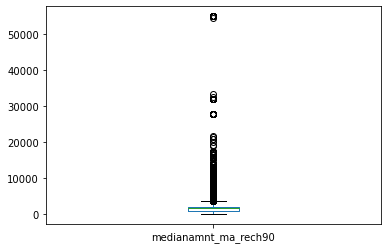

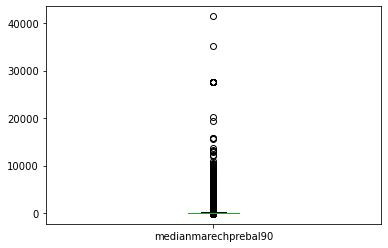

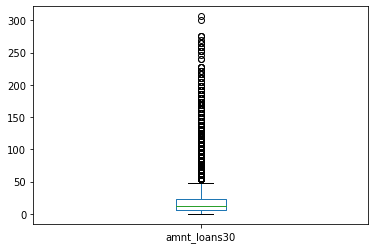

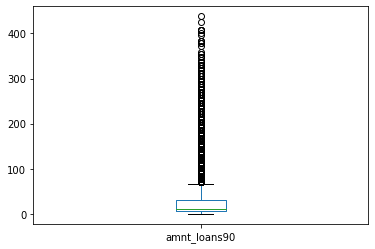

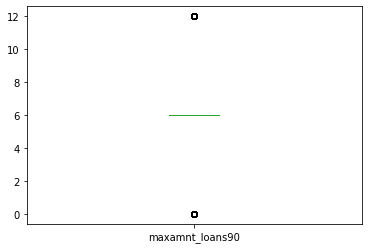

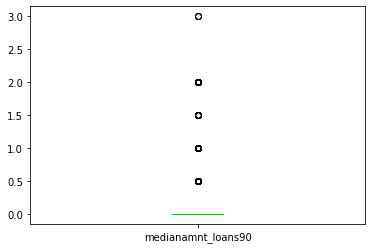

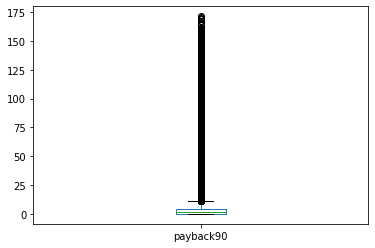

In [220]:
for i in cols:
    df[i].plot.box()
    plt.show()

We are able to see here that IQR will not be able to remove the outliers.

Let us check the skewness in the data.

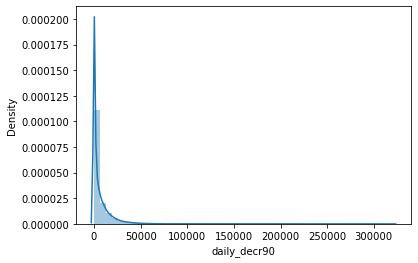

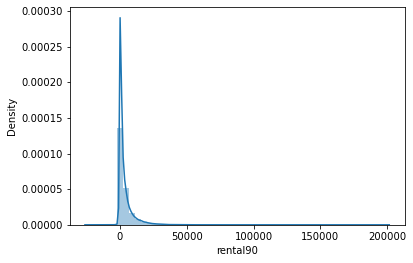

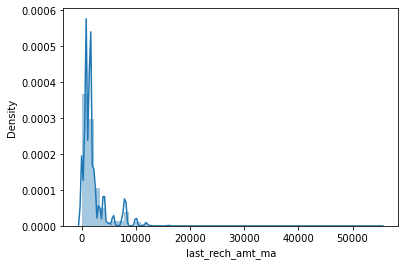

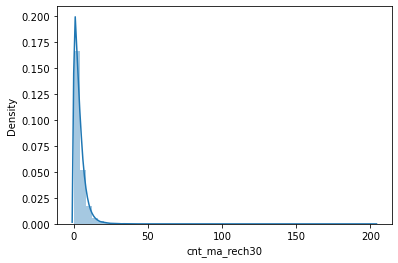

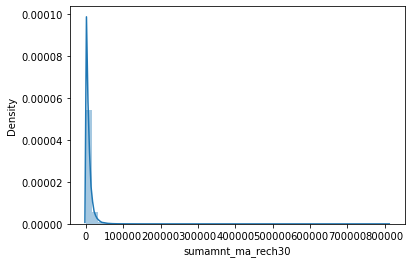

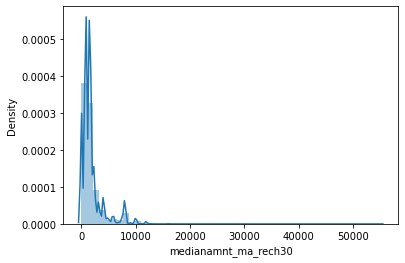

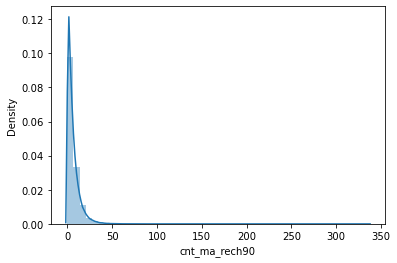

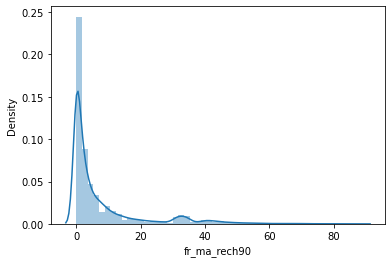

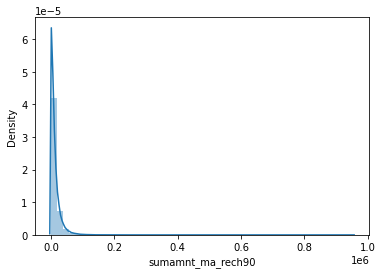

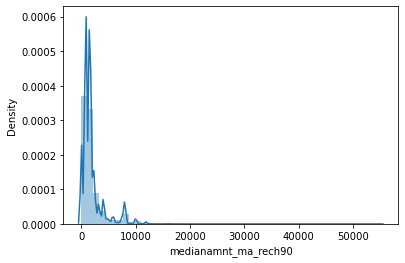

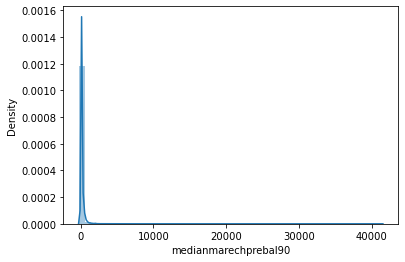

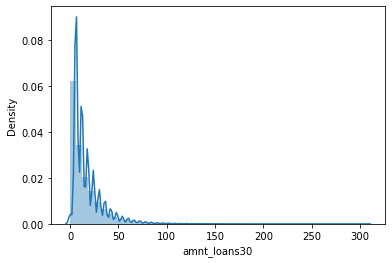

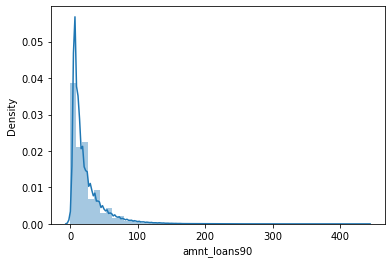

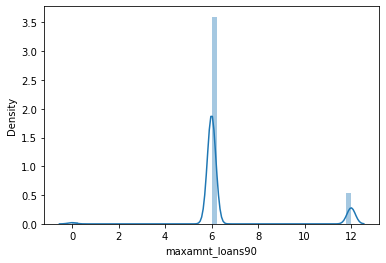

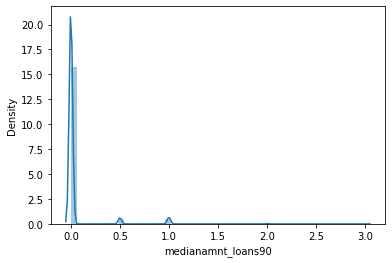

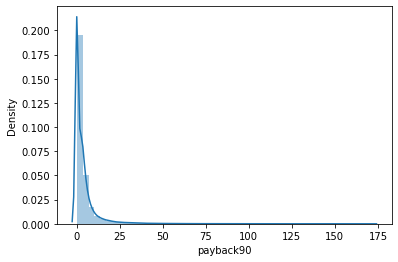

In [221]:
for i in cols:
    sns.distplot(df[i])
    plt.show()

We are able to see a huge skewness, mostly right tail data in most of the columns that we have.

Let's confirm the same from the df.skew command ass well.

In [222]:
df.skew()

label                   -2.270254
daily_decr90             4.252565
rental90                 4.437681
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
amnt_loans30             2.975719
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loans90       4.895720
payback90                6.899951
dtype: float64

There is a huge skewness in the data.

26162
Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            209582, 209583, 209585, 209586, 209587, 209588, 209589, 209590,
            209591, 209592],
           dtype='int64', length=183431)
26162
Int64Index([     0,     11,     15,     16,     21,     24,     27,     46,
                74,     76,
            ...
            209525, 209533, 209535, 209537, 209541, 209547, 209549, 209554,
            209571, 209584],
           dtype='int64', length=26162)
0    26162
1    26162
Name: label, dtype: int64


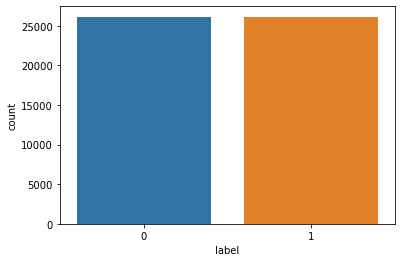

In [224]:
minorityclass_len=len(df[df['label']==0])
print(minorityclass_len)
majorityclass_ind=df[df['label']==1].index
print(majorityclass_ind)
random_maj=np.random.choice(majorityclass_ind,minorityclass_len,replace=False)
print(len(random_maj))
minclass_ind=df[df['label']==0].index
print(minclass_ind)
undersample_ind=np.concatenate([minclass_ind,random_maj])
undersample=df.loc[undersample_ind]
sns.countplot(x='label',data=undersample)
print(undersample['label'].value_counts())
plt.show()


As we saw above, there is an imbalanced data that will not give a good accuracy. so we had sampled the data now and we have equally distributed variables now.

Let us initially split the data to x and y and then proceed.

In [233]:
undersample

label  daily_decr90  rental90  last_rech_amt_ma  cnt_ma_rech30  \
0           0   3065.150000    260.13              1539              2   
11          0     65.166667    326.20              7526              2   
15          0     12.000000   1216.80                 0              0   
16          0   1000.000000   1087.88                 0              0   
21          0    515.200000     58.20               773              1   
...       ...           ...       ...               ...            ...   
155347      1      1.408333    761.65              1547              1   
98151       1      0.000000   9001.42               773              0   
14400       1     69.241333     42.24              7560              1   
89581       1   8317.700000   3495.19              1539              7   
113911      1     25.731333    669.50              1539              2   

        sumamnt_ma_rech30  medianamnt_ma_rech30  cnt_ma_rech90  fr_ma_rech90  \
0                  3078.0                1539.0              2            21   
11                 9065.0                4532.5              2             0   
15                    0.0                   0.0              0             0   
16                    0.0                   0.0              0             0   
21                  773.0                 773.0              2            64   
...                   ...                   ...            ...           ...   
155347             1547.0                1547.0              1             0   
98151                 0.0                   0.0              1             0   
14400              7560.0                7560.0              1             0   
89581              6937.0                 773.0             10             4   
113911             3078.0                1539.0              2             6   

        sumamnt_ma_rech90  medianamnt_ma_rech90  medianmarechprebal90  \
0                    3078                1539.0                 7.500   
11                   9065                4532.5               489.000   
15                      0                   0.0                 0.000   
16                      0                   0.0                 0.000   
21                   1546                 773.0               283.500   
...                   ...                   ...                   ...   
155347               1547                1547.0                65.000   
98151                 773                 773.0                 0.500   
14400                7560                7560.0                86.000   
89581                9430                 773.0                14.450   
113911               3078                1539.0                70.165   

        amnt_loans30  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0                 12            12                6                 0.0   
11                 6             6                6                 0.0   
15                 6             6                6                 0.0   
16                 6             6                6                 0.0   
21                12            12                6                 0.0   
...              ...           ...              ...                 ...   
155347             6             6                6                 0.0   
98151              0             0                0                 0.0   
14400              6             6                6                 0.0   
89581             48            48                6                 0.0   
113911            12            12                6                 0.0   

        payback90  
0          29.000  
11          0.000  
15          0.000  
16          0.000  
21          0.000  
...           ...  
155347      0.000  
98151       0.000  
14400       0.000  
89581       5.875  
113911     18.000  

[52324 rows x 17 columns]

In [234]:
x=undersample.drop(columns='label')

In [235]:
y=undersample['label']

In [236]:
x

daily_decr90  rental90  last_rech_amt_ma  cnt_ma_rech30  \
0        3065.150000    260.13              1539              2   
11         65.166667    326.20              7526              2   
15         12.000000   1216.80                 0              0   
16       1000.000000   1087.88                 0              0   
21        515.200000     58.20               773              1   
...              ...       ...               ...            ...   
155347      1.408333    761.65              1547              1   
98151       0.000000   9001.42               773              0   
14400      69.241333     42.24              7560              1   
89581    8317.700000   3495.19              1539              7   
113911     25.731333    669.50              1539              2   

        sumamnt_ma_rech30  medianamnt_ma_rech30  cnt_ma_rech90  fr_ma_rech90  \
0                  3078.0                1539.0              2            21   
11                 9065.0                4532.5              2             0   
15                    0.0                   0.0              0             0   
16                    0.0                   0.0              0             0   
21                  773.0                 773.0              2            64   
...                   ...                   ...            ...           ...   
155347             1547.0                1547.0              1             0   
98151                 0.0                   0.0              1             0   
14400              7560.0                7560.0              1             0   
89581              6937.0                 773.0             10             4   
113911             3078.0                1539.0              2             6   

        sumamnt_ma_rech90  medianamnt_ma_rech90  medianmarechprebal90  \
0                    3078                1539.0                 7.500   
11                   9065                4532.5               489.000   
15                      0                   0.0                 0.000   
16                      0                   0.0                 0.000   
21                   1546                 773.0               283.500   
...                   ...                   ...                   ...   
155347               1547                1547.0                65.000   
98151                 773                 773.0                 0.500   
14400                7560                7560.0                86.000   
89581                9430                 773.0                14.450   
113911               3078                1539.0                70.165   

        amnt_loans30  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0                 12            12                6                 0.0   
11                 6             6                6                 0.0   
15                 6             6                6                 0.0   
16                 6             6                6                 0.0   
21                12            12                6                 0.0   
...              ...           ...              ...                 ...   
155347             6             6                6                 0.0   
98151              0             0                0                 0.0   
14400              6             6                6                 0.0   
89581             48            48                6                 0.0   
113911            12            12                6                 0.0   

        payback90  
0          29.000  
11          0.000  
15          0.000  
16          0.000  
21          0.000  
...           ...  
155347      0.000  
98151       0.000  
14400       0.000  
89581       5.875  
113911     18.000  

[52324 rows x 16 columns]

In [238]:
y

0         0
11        0
15        0
16        0
21        0
         ..
155347    1
98151     1
14400     1
89581     1
113911    1
Name: label, Length: 52324, dtype: int64

Let us proceed to try removing the skewness in the data.

In [239]:
x.skew()

daily_decr90             5.560595
rental90                 5.019372
last_rech_amt_ma         5.282413
cnt_ma_rech30            3.154729
sumamnt_ma_rech30        4.852054
medianamnt_ma_rech30     4.968826
cnt_ma_rech90            3.457730
fr_ma_rech90             2.565398
sumamnt_ma_rech90        5.071456
medianamnt_ma_rech90     5.314805
medianmarechprebal90    47.232899
amnt_loans30             3.584346
amnt_loans90             3.934590
maxamnt_loans90          2.351812
medianamnt_loans90       5.139268
payback90                6.954517
dtype: float64

In [240]:
x.columns

Index(['daily_decr90', 'rental90', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'amnt_loans30', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback90'],
      dtype='object')

In [241]:
x.dtypes

daily_decr90            float64
rental90                float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
amnt_loans30              int64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback90               float64
dtype: object

In [242]:
col=['daily_decr90', 'rental90', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'amnt_loans30', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback90']

In [243]:
x=np.cbrt(x)

In [244]:
x.skew()

daily_decr90            0.938081
rental90                0.259550
last_rech_amt_ma       -0.315896
cnt_ma_rech30          -0.212933
sumamnt_ma_rech30       0.105162
medianamnt_ma_rech30   -0.281760
cnt_ma_rech90          -0.094987
fr_ma_rech90            0.701551
sumamnt_ma_rech90       0.224864
medianamnt_ma_rech90   -0.389014
medianmarechprebal90    0.613322
amnt_loans30            0.960638
amnt_loans90            1.334390
maxamnt_loans90        -3.880205
medianamnt_loans90      4.246916
payback90               1.222192
dtype: float64

We have almost removed all the skewness from the data, also we are able to see here that there are 2-3 columns whose values are unchanged, we will kepp it ass such and proceed.

We have also tried the power tranformer methods as well but none of them seem to be working ass good as cbrt.

Z score removal.

Even after removing the skewness from the data, we are able to see that there are many outliers present in the data, but as we are loosing more thana 10% data in the outlier removal using iqr and zscore, we will keep that outliers with us and work on them.

Standardisation.

As we have a huge differnece in the data, its best that we standardise the data so that every column comes to the same range.

In [245]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

x = pd.DataFrame(x, columns = col)
x

daily_decr90  rental90  last_rech_amt_ma  cnt_ma_rech30  \
0          0.523539 -0.572333          0.360114       0.263721   
1         -0.639796 -0.503768          1.777222       0.263721   
2         -0.831957  0.016013         -1.671975      -1.470425   
3          0.022164 -0.037608         -1.671975      -1.470425   
4         -0.197539 -0.916132         -0.056663      -0.094032   
...             ...       ...               ...            ...   
52319     -0.961398 -0.195556          0.363629      -0.094032   
52320     -1.085564  1.403956         -0.056663      -1.470425   
52321     -0.630693 -0.969956          1.782408      -0.094032   
52322      1.158839  0.632822          0.360114       1.162519   
52323     -0.758534 -0.248224          0.360114       0.263721   

       sumamnt_ma_rech30  medianamnt_ma_rech30  cnt_ma_rech90  fr_ma_rech90  \
0               0.193991              0.488657      -0.000369      1.467110   
1               0.876068              1.354325      -0.000369     -0.908534   
2              -1.379802             -1.508746      -1.575738     -0.908534   
3              -1.379802             -1.508746      -1.575738     -0.908534   
4              -0.386874              0.078994      -0.000369      2.535772   
...                  ...                   ...            ...           ...   
52319          -0.128521              0.492112      -0.325367     -0.908534   
52320          -1.379802             -1.508746      -0.325367     -0.908534   
52321           0.743599              1.886674      -0.325367     -0.908534   
52322           0.683591              0.078994       1.118105      0.458339   
52323           0.193991              0.488657      -0.000369      0.656145   

       sumamnt_ma_rech90  medianamnt_ma_rech90  medianmarechprebal90  \
0              -0.054886              0.406285             -0.349312   
1               0.556066              1.318132              2.149002   
2              -1.464570             -1.697672             -1.175243   
3              -1.464570             -1.697672             -1.175243   
4              -0.344009             -0.025233              1.596637   
...                  ...                   ...                   ...   
52319          -0.343768              0.409924              0.521286   
52320          -0.575181             -0.025233             -0.840344   
52321           0.437411              1.878880              0.687228   
52322           0.582830             -0.025233             -0.147512   
52323          -0.054886              0.406285              0.565082   

       amnt_loans30  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0          0.090448     -0.080744        -0.163620           -0.227201   
1         -0.661981     -0.706829        -0.163620           -0.227201   
2         -0.661981     -0.706829        -0.163620           -0.227201   
3         -0.661981     -0.706829        -0.163620           -0.227201   
4          0.090448     -0.080744        -0.163620           -0.227201   
...             ...           ...              ...                 ...   
52319     -0.661981     -0.706829        -0.163620           -0.227201   
52320     -3.556818     -3.115579        -9.572045           -0.227201   
52321     -0.661981     -0.706829        -0.163620           -0.227201   
52322      2.232856      1.701921        -0.163620           -0.227201   
52323      0.090448     -0.080744        -0.163620           -0.227201   

       payback90  
0       2.345263  
1      -0.708721  
2      -0.708721  
3      -0.708721  
4      -0.708721  
...          ...  
52319  -0.708721  
52320  -0.708721  
52321  -0.708721  
52322   1.084925  
52323   1.896382  

[52324 rows x 16 columns]

We have bought down the huge values here.

Let us now split the data to train and test.

In [246]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.30,random_state=25)

Not using for loop for test and random state as we usually work on getting the best random state and use that for other models as well, however there is a possibility the the random value chanage with the model we use to get the best random state or test size hence not using that and assuming mostly used 30 7- split for test and a random value for random state as I presume that it might not bring a big difference in the data.

In [247]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Creating instances.

In [248]:
lr = LogisticRegression()
gnb=GaussianNB()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()

In [249]:
print('The model is: ',lr)
lr.fit(x_train,y_train)
predict=lr.predict(x_test)
pred_train=lr.predict(x_train)
print('Accuracy score for the training : ',accuracy_score(y_train,pred_train))
print('Accuracy score for the model is: ',accuracy_score(y_test,predict))
print('Calssification Report is: ',classification_report(y_test,predict))
print('Confusion Matrix is: ',confusion_matrix(y_test,predict))
print('\n\n')

The model is:  LogisticRegression()
Accuracy score for the training :  0.7609348550210233
Accuracy score for the model is:  0.75888648235444
Calssification Report is:                precision    recall  f1-score   support

           0       0.76      0.77      0.76      7995
           1       0.76      0.75      0.75      7703

    accuracy                           0.76     15698
   macro avg       0.76      0.76      0.76     15698
weighted avg       0.76      0.76      0.76     15698

Confusion Matrix is:  [[6153 1842]
 [1943 5760]]





As we had sampled the data earlier, we are able to see a good score in the 0's and 1's as well.

from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [ ]:
y_predprob=lr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_predprob)

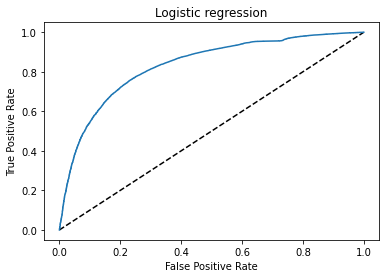

In [250]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic regression')
plt.show()

It will be a hectic task for us to copy paste all the times hence let us create 2 functions for report generation and auc roc curve.

In [277]:
def model_rep(y_test,predict):
    print('Acccuracy is: ',accuracy_score(y_test,predict))
    print('Classification Report is: ',classification_report(y_test,predict))
    print('Confusion Matrix:',confusion_matrix(y_test,predict))
    pass

In [310]:
def aucroccurve(clf,x_test):
    y_predprob=clf.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_predprob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    pass
    

## Logistic regression

In [279]:
clf=lr.fit(x_train,y_train)
predict=clf.predict(x_test)

In [280]:
model_rep(y_test,predict)

Acccuracy is:  0.75888648235444
Classification Report is:                precision    recall  f1-score   support

           0       0.76      0.77      0.76      7995
           1       0.76      0.75      0.75      7703

    accuracy                           0.76     15698
   macro avg       0.76      0.76      0.76     15698
weighted avg       0.76      0.76      0.76     15698

Confusion Matrix: [[6153 1842]
 [1943 5760]]


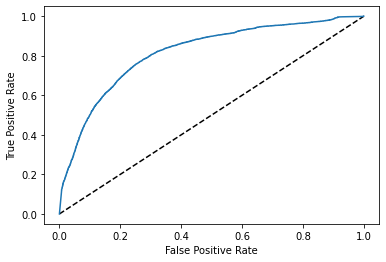

In [311]:
aucroccurve(clf,x_test)

Cross validation

In [282]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [283]:
for j in range (2,10):
        test_accuracy = accuracy_score(y_test, predict)
        cv_score = cross_val_score(lr, x, y, cv = j)
        cv_mean = cv_score.mean()
        print(f'At cross fold {j} the cv score is {cv_mean}')
        print('\n\n')

At cross fold 2 the cv score is 0.7600718599495451



At cross fold 3 the cv score is 0.7603967606740629



At cross fold 4 the cv score is 0.7604349820350126



At cross fold 5 the cv score is 0.7606641732818438



At cross fold 6 the cv score is 0.7603775220766634



At cross fold 7 the cv score is 0.7604730858024012



At cross fold 8 the cv score is 0.7603203557938705



At cross fold 9 the cv score is 0.760645028932702





We can consider that 76.1 is the best model at cv=1

Randomised search CV

In [286]:
from sklearn.model_selection import RandomizedSearchCV

param = {'penalty':['l1','l2','elasticnet','none'],'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 'multi_class' : ['auto','ovr','multinomial']}

modellr = LogisticRegression()

rnd = RandomizedSearchCV(modellr,param,cv=2)


rnd_result = rnd.fit(x_train, y_train)


print(rnd.best_params_)

print('Best Score: ', rnd_result.best_score_)

{'solver': 'saga', 'penalty': 'l1', 'multi_class': 'auto'}
Best Score:  0.7607437339594824


In [287]:
lr=LogisticRegression(solver='saga',penalty='l1',multi_class='auto')

In [341]:
lr.fit(x_train, y_train)
lr.score(x_train, y_train)
predlr = lr.predict(x_test)

In [342]:
print('Errors:')
print('\n')
print('Accuracy score for the training : ',accuracy_score(y_train,pred_train))
print('Accuracy score for the model is: ',accuracy_score(y_test,predlr))
print('Calssification Report is: ',classification_report(y_test,predlr))
print('Confusion Matrix is: ',confusion_matrix(y_test,predlr))
print('\n\n')

Errors:


Accuracy score for the training :  0.7609348550210233
Accuracy score for the model is:  0.7590775895018473
Calssification Report is:                precision    recall  f1-score   support

           0       0.76      0.77      0.76      7995
           1       0.76      0.75      0.75      7703

    accuracy                           0.76     15698
   macro avg       0.76      0.76      0.76     15698
weighted avg       0.76      0.76      0.76     15698

Confusion Matrix is:  [[6154 1841]
 [1941 5762]]





## RandomForest

In [292]:
clf=rf.fit(x_train,y_train)
predict=clf.predict(x_test)

In [293]:
model_rep(y_test,predict)

Acccuracy is:  0.8037329596126895
Classification Report is:                precision    recall  f1-score   support

           0       0.82      0.78      0.80      7995
           1       0.78      0.83      0.81      7703

    accuracy                           0.80     15698
   macro avg       0.80      0.80      0.80     15698
weighted avg       0.80      0.80      0.80     15698

Confusion Matrix: [[6245 1750]
 [1331 6372]]


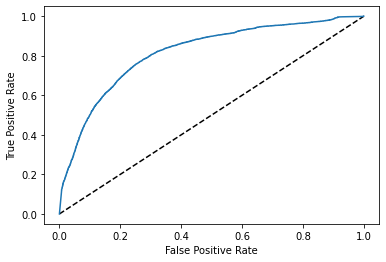

In [312]:
aucroccurve(clf,x_test)

Cross Validation

In [297]:
for j in range (2,10):
        test_accuracy = accuracy_score(y_test, predict)
        cv_score = cross_val_score(rf, x, y, cv = j)
        cv_mean = cv_score.mean()
        print(f'At cross fold {j} the cv score is {cv_mean}')
        print('\n\n')

At cross fold 2 the cv score is 0.7993654919348674



At cross fold 3 the cv score is 0.8015824469496465



At cross fold 4 the cv score is 0.8009517620976989



At cross fold 5 the cv score is 0.8024996274168592



At cross fold 6 the cv score is 0.8021174065062118



At cross fold 7 the cv score is 0.8025187338403007



At cross fold 8 the cv score is 0.802442377695711



At cross fold 9 the cv score is 0.8032258975294025





We can consider that 80.3 is the best model at cv=9

Randomised search CV

In [321]:
from sklearn.model_selection import RandomizedSearchCV

param = {'criterion':['gini','entropy'],'max_features':['log2','auto','sqrt'], 'n_estimators' : [10,20,30, 40, 50],'min_samples_split' : [2,4,8]}

modelrf = RandomForestClassifier()

rnd = RandomizedSearchCV(modelrf,param,cv=9)


rnd_result = rnd.fit(x_train, y_train)


print(rnd.best_params_)

print('Best Score: ', rnd_result.best_score_)

{'n_estimators': 50, 'min_samples_split': 8, 'max_features': 'log2', 'criterion': 'entropy'}
Best Score:  0.8029815467515148


In [331]:
rfc = RandomForestClassifier(criterion = 'entropy', max_features = 'log2', n_estimators = 50,min_samples_split=8)

In [356]:
rfc.fit(x_train, y_train)
rfc.score(x_train, y_train)
predrfc = rfc.predict(x_test)
print('Errors:')
print('\n')
print('Accuracy score for the training : ',accuracy_score(y_train,pred_train))
print('Accuracy score for the model is: ',accuracy_score(y_test,predrfc))
print('Calssification Report is: ',classification_report(y_test,predrfc))
print('Confusion Matrix is: ',confusion_matrix(y_test,predrfc))
print('\n\n')

Errors:


Accuracy score for the training :  0.7609348550210233
Accuracy score for the model is:  0.8038603643776278
Calssification Report is:                precision    recall  f1-score   support

           0       0.83      0.78      0.80      7995
           1       0.78      0.83      0.81      7703

    accuracy                           0.80     15698
   macro avg       0.80      0.80      0.80     15698
weighted avg       0.81      0.80      0.80     15698

Confusion Matrix is:  [[6230 1765]
 [1314 6389]]





We have got the result for this, let us move ahead.

### Decision Tree Classifier

In [333]:
clf=dtc.fit(x_train,y_train)
predict=clf.predict(x_test)

In [334]:
model_rep(y_test,predict)

Acccuracy is:  0.7355077079882788
Classification Report is:                precision    recall  f1-score   support

           0       0.74      0.74      0.74      7995
           1       0.73      0.73      0.73      7703

    accuracy                           0.74     15698
   macro avg       0.74      0.74      0.74     15698
weighted avg       0.74      0.74      0.74     15698

Confusion Matrix: [[5922 2073]
 [2079 5624]]


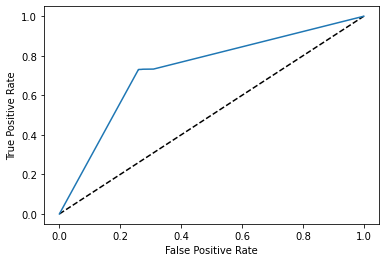

In [335]:
aucroccurve(clf,x_test)

In [336]:
for j in range (2,10):
        test_accuracy = accuracy_score(y_test, predict)
        cv_score = cross_val_score(dtc, x, y, cv = j)
        cv_mean = cv_score.mean()
        print(f'At cross fold {j} the cv score is {cv_mean}')
        print('\n\n')

At cross fold 2 the cv score is 0.7319967892362969



At cross fold 3 the cv score is 0.7349781485625823



At cross fold 4 the cv score is 0.7376729607828147



At cross fold 5 the cv score is 0.7380359462369833



At cross fold 6 the cv score is 0.7374053087086007



At cross fold 7 the cv score is 0.736010080366516



At cross fold 8 the cv score is 0.738341887351811



At cross fold 9 the cv score is 0.737156961012179





At cv =3, we have the best model with least difference in the predicted data.

In [329]:
from sklearn.model_selection import RandomizedSearchCV

param = {'criterion':['gini','entropy'],'max_features':['log2','auto','sqrt'],'splitter' : ['best','random']}

modeldt = DecisionTreeClassifier()

rnd = RandomizedSearchCV(modeldt,param,cv=3)


rnd_result = rnd.fit(x_train, y_train)


print(rnd.best_params_)

print('Best Score: ', rnd_result.best_score_)

{'splitter': 'best', 'max_features': 'sqrt', 'criterion': 'entropy'}
Best Score:  0.7325123680505407


In [338]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_features = 'sqrt',splitter='best')

In [339]:
dt.fit(x_train, y_train)
dt.score(x_train, y_train)
preddt = dt.predict(x_test)
print('Errors:')
print('\n')
print('Accuracy score for the training : ',accuracy_score(y_train,pred_train))
print('Accuracy score for the model is: ',accuracy_score(y_test,preddt))
print('Calssification Report is: ',classification_report(y_test,preddt))
print('Confusion Matrix is: ',confusion_matrix(y_test,preddt))
print('\n\n')

Errors:


Accuracy score for the training :  0.7609348550210233
Accuracy score for the model is:  0.7423238629124729
Calssification Report is:                precision    recall  f1-score   support

           0       0.75      0.74      0.75      7995
           1       0.74      0.74      0.74      7703

    accuracy                           0.74     15698
   macro avg       0.74      0.74      0.74     15698
weighted avg       0.74      0.74      0.74     15698

Confusion Matrix is:  [[5934 2061]
 [1984 5719]]





We have the details sorted, let us move ahead.

### Gaussian NB

In [306]:
clf=gnb.fit(x_train,y_train)
predict=clf.predict(x_test)

In [307]:
model_rep(y_test,predict)

Acccuracy is:  0.7523251369601223
Classification Report is:                precision    recall  f1-score   support

           0       0.76      0.75      0.76      7995
           1       0.75      0.75      0.75      7703

    accuracy                           0.75     15698
   macro avg       0.75      0.75      0.75     15698
weighted avg       0.75      0.75      0.75     15698

Confusion Matrix: [[6026 1969]
 [1919 5784]]


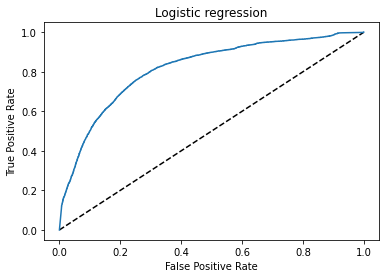

In [308]:
aucroccurve(clf,x_test)

In [309]:
for j in range (2,10):
        test_accuracy = accuracy_score(y_test, predict)
        cv_score = cross_val_score(gnb, x, y, cv = j)
        cv_mean = cv_score.mean()
        print(f'At cross fold {j} the cv score is {cv_mean}')
        print('\n\n')

At cross fold 2 the cv score is 0.7523889610886018



At cross fold 3 the cv score is 0.7524462590836744



At cross fold 4 the cv score is 0.7523507377111841



At cross fold 5 the cv score is 0.7524652547957295



At cross fold 6 the cv score is 0.7525798982700901



At cross fold 7 the cv score is 0.7526373127750656



At cross fold 8 the cv score is 0.7524461880530571



At cross fold 9 the cv score is 0.752598983470609





cv@2 is the best score that we have.

In [347]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb = GaussianNB()

gnbcv = RandomizedSearchCV(gnb, parameters)
gnbcv.fit(x_train, y_train)

print(gnbcv.best_params_)

{'var_smoothing': 1.873817422860383e-08}


In [348]:
gnb=GaussianNB(var_smoothing=1.873817422860383e-08)

In [349]:
gnb.fit(x_train, y_train)
gnb.score(x_train, y_train)
predgn = gnb.predict(x_test)
print('Errors:')
print('\n')
print('Accuracy score for the training : ',accuracy_score(y_train,pred_train))
print('Accuracy score for the model is: ',accuracy_score(y_test,predgn))
print('Calssification Report is: ',classification_report(y_test,predgn))
print('Confusion Matrix is: ',confusion_matrix(y_test,predgn))
print('\n\n')

Errors:


Accuracy score for the training :  0.7609348550210233
Accuracy score for the model is:  0.7523251369601223
Calssification Report is:                precision    recall  f1-score   support

           0       0.76      0.75      0.76      7995
           1       0.75      0.75      0.75      7703

    accuracy                           0.75     15698
   macro avg       0.75      0.75      0.75     15698
weighted avg       0.75      0.75      0.75     15698

Confusion Matrix is:  [[6026 1969]
 [1919 5784]]





We have the data here now.

## K Nearest neighbors

In [352]:
clf=knc.fit(x_train,y_train)
predict=clf.predict(x_test)

In [353]:
model_rep(y_test,predict)

Acccuracy is:  0.7766594470633201
Classification Report is:                precision    recall  f1-score   support

           0       0.78      0.77      0.78      7995
           1       0.77      0.78      0.77      7703

    accuracy                           0.78     15698
   macro avg       0.78      0.78      0.78     15698
weighted avg       0.78      0.78      0.78     15698

Confusion Matrix: [[6192 1803]
 [1703 6000]]


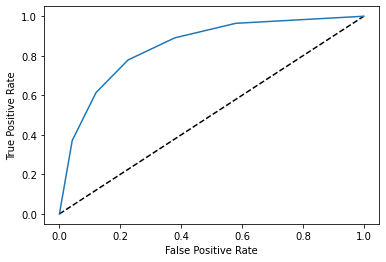

In [354]:
aucroccurve(clf,x_test)

In [355]:
for j in range (2,10):
        test_accuracy = accuracy_score(y_test, predict)
        cv_score = cross_val_score(knc, x, y, cv = j)
        cv_mean = cv_score.mean()
        print(f'At cross fold {j} the cv score is {cv_mean}')
        print('\n\n')

At cross fold 2 the cv score is 0.7705641770506841



At cross fold 3 the cv score is 0.77442480557627



At cross fold 4 the cv score is 0.7729913615167036



At cross fold 5 the cv score is 0.7721313052391034



At cross fold 6 the cv score is 0.7738321933383757



At cross fold 7 the cv score is 0.7739852006145592



At cross fold 8 the cv score is 0.7741572097337566



At cross fold 9 the cv score is 0.7737366698271911





Best score is at cv =3

In [357]:
from sklearn.model_selection import RandomizedSearchCV

param = {'n_neighbors':[1,2,3,4,5,6],'weights':['uniform','distance'],'algorithm' : ['auto','ball_tree','kd_tree','bute']}

modelkn = KNeighborsClassifier()

rnd = RandomizedSearchCV(modelkn,param,cv=3)


rnd_result = rnd.fit(x_train, y_train)


print(rnd.best_params_)

print('Best Score: ', rnd_result.best_score_)

{'weights': 'uniform', 'n_neighbors': 6, 'algorithm': 'ball_tree'}
Best Score:  0.7668323060633103


In [359]:
knc=KNeighborsClassifier(n_neighbors=6,weights='uniform',algorithm='ball_tree')

In [360]:
knc.fit(x_train, y_train)
knc.score(x_train, y_train)
predkn = knc.predict(x_test)
print('Errors:')
print('\n')
print('Accuracy score for the training : ',accuracy_score(y_train,pred_train))
print('Accuracy score for the model is: ',accuracy_score(y_test,predkn))
print('Calssification Report is: ',classification_report(y_test,predkn))
print('Confusion Matrix is: ',confusion_matrix(y_test,predkn))
print('\n\n')

Errors:


Accuracy score for the training :  0.7609348550210233
Accuracy score for the model is:  0.7718817683781374
Calssification Report is:                precision    recall  f1-score   support

           0       0.75      0.83      0.79      7995
           1       0.80      0.72      0.76      7703

    accuracy                           0.77     15698
   macro avg       0.77      0.77      0.77     15698
weighted avg       0.77      0.77      0.77     15698

Confusion Matrix is:  [[6598 1397]
 [2184 5519]]





As we have gone through the details here, we see that the best F1 score is in we are able to conclude that Random forest is the best model.

...................................................xxxxxxxxxxxxxxxxxxxxxx............................